# ЛР3

In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations
%matplotlib inline 
sns.set(style="ticks")

In [2]:
reservation_df = pd.read_csv("datasets/Hotel Reservations.csv", low_memory=False)
reservation_df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [3]:
reservation_df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [4]:
reservation_df[reservation_df["booking_status"] == "Canceled"].describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,11885.000000,11885.000000,11885.000000,11885.000000,11885.000000,11885.000000,11885.000000,11885.000000,11885.000000,11885.000000,11885.000000,11885.000000,11885.000000,11885.000000
mean,1.909550,0.124358,0.887505,2.392259,0.009592,139.215482,2017.919142,7.374253,15.730080,0.001346,0.005553,0.002188,110.589966,0.334623
std,0.486243,0.440903,0.919267,1.583088,0.097472,98.947731,0.272629,2.655423,8.783946,0.036668,0.241941,0.129710,32.264394,0.574345
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,55.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,89.270000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,122.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,108.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,205.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,126.360000,1.000000
max,4.000000,9.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,12.000000,540.000000,2.000000


In [5]:
reservation_df[reservation_df["booking_status"] == "Not_Canceled"].describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,24390.000000,24390.000000,24390.000000,24390.000000,24390.000000,24390.000000,24390.000000,24390.000000,24390.000000,24390.000000,24390.000000,24390.000000,24390.000000,24390.000000
mean,1.813489,0.095982,0.773309,2.112710,0.041410,58.927224,2017.772325,7.447724,15.532144,0.037474,0.032021,0.227101,99.931412,0.758549
std,0.530993,0.382288,0.843428,1.309173,0.199242,64.028714,0.419340,3.252560,8.718617,0.189925,0.415967,2.133507,35.872154,0.836532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,10.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,77.860000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,39.000000,2018.000000,8.000000,15.000000,0.000000,0.000000,0.000000,95.000000,1.000000
75%,2.000000,0.000000,1.000000,3.000000,0.000000,86.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,119.100000,1.000000
max,4.000000,10.000000,6.000000,17.000000,1.000000,386.000000,2018.000000,12.000000,31.000000,1.000000,11.000000,58.000000,375.500000,5.000000


In [6]:
# lead_time
# no_of_previous_bookings_not_canceled
# эти признаки могут иметь большее значение для модели
# при этом три признака про дату - имеют большой вес, но почти не позволяют разделить два класса

<AxesSubplot: xlabel='lead_time', ylabel='booking_status'>

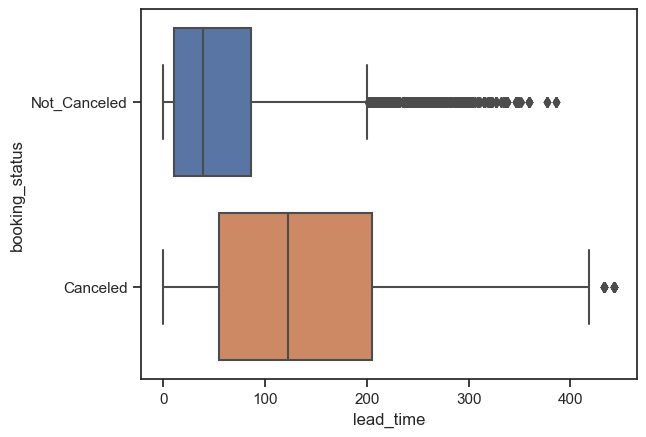

In [7]:
sns.boxplot(x=reservation_df["lead_time"], y=reservation_df["booking_status"])

In [8]:
def remove_outliers(df, label):
    q1 = df[label].quantile(0.25)
    q3 = df[label].quantile(0.75)
    iqr = (q3 - q1)
    fil = (df[label] >= q1 - 1.5 * iqr) & (df[label] <= q3 + 1.5 * iqr)
    return df.loc[fil]

In [9]:
reservation_df = remove_outliers(reservation_df, "lead_time")

In [10]:
# to_drop = reservation_df.loc[
#         reservation_df["booking_status"] == "Not_Canceled"
#     ].loc[
#         reservation_df["lead_time"] > 200
#     ]

# reservation_df.drop(
#     to_drop.index, 
#     inplace=True
# )

<AxesSubplot: xlabel='lead_time', ylabel='booking_status'>

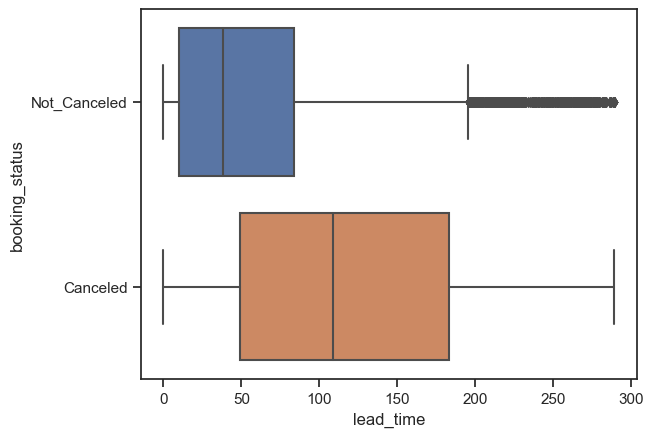

In [11]:
sns.boxplot(x=reservation_df["lead_time"], y=reservation_df["booking_status"])

<AxesSubplot: xlabel='avg_price_per_room', ylabel='booking_status'>

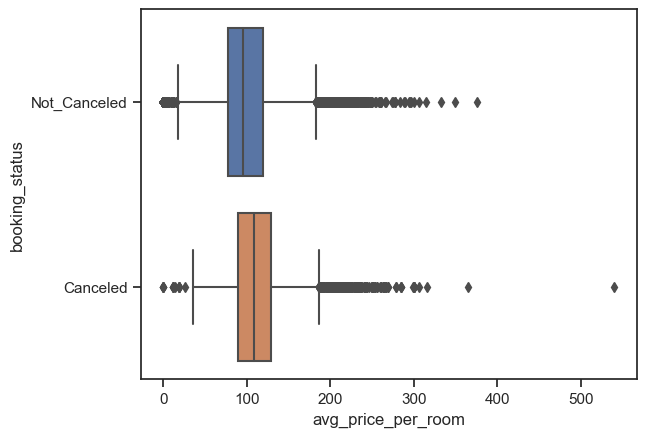

In [12]:
sns.boxplot(x=reservation_df["avg_price_per_room"], y=reservation_df["booking_status"])

<AxesSubplot: xlabel='no_of_special_requests', ylabel='booking_status'>

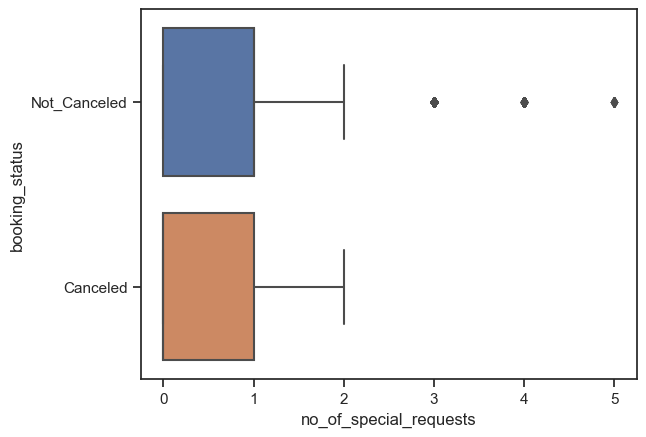

In [13]:
# no_of_special_requests
sns.boxplot(x=reservation_df["no_of_special_requests"], y=reservation_df["booking_status"])

<AxesSubplot: ylabel='booking_status'>

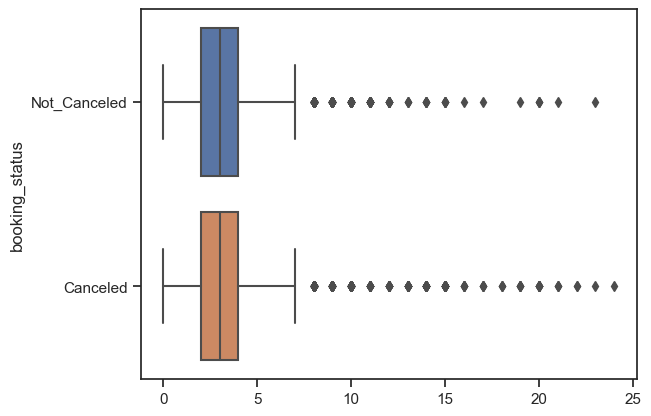

In [14]:
# no_of_weekend_nights, no_of_week_nights
sns.boxplot(x=reservation_df["no_of_weekend_nights"] + reservation_df["no_of_week_nights"], y=reservation_df["booking_status"])

In [15]:
reservation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34944 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            34944 non-null  object 
 1   no_of_adults                          34944 non-null  int64  
 2   no_of_children                        34944 non-null  int64  
 3   no_of_weekend_nights                  34944 non-null  int64  
 4   no_of_week_nights                     34944 non-null  int64  
 5   type_of_meal_plan                     34944 non-null  object 
 6   required_car_parking_space            34944 non-null  int64  
 7   room_type_reserved                    34944 non-null  object 
 8   lead_time                             34944 non-null  int64  
 9   arrival_year                          34944 non-null  int64  
 10  arrival_month                         34944 non-null  int64  
 11  arrival_date   

In [16]:
# удаляем ненужные признаки
col_to_drop = [
    "Booking_ID",
    "arrival_year",
    "arrival_date",
    "arrival_month",
    "no_of_weekend_nights",
    "no_of_week_nights"
]

reservation_df.drop(col_to_drop, axis=1, inplace=True)

In [17]:
# проверяем количество пропусков
reservation_df.isna().sum()

no_of_adults                            0
no_of_children                          0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

## Матрица корреляции

In [18]:
categorical_columns =[
    "type_of_meal_plan",
    "room_type_reserved",
    "market_segment_type",
    "booking_status",
]

In [19]:
res_corr = associations(reservation_df, nominal_columns=categorical_columns, cmap='RdBu_r',
                        title='Матрица корреляции и зависимости атрибутов',
                        clustering=True, figsize=(18,18), plot=False, compute_only=True)

<AxesSubplot: >

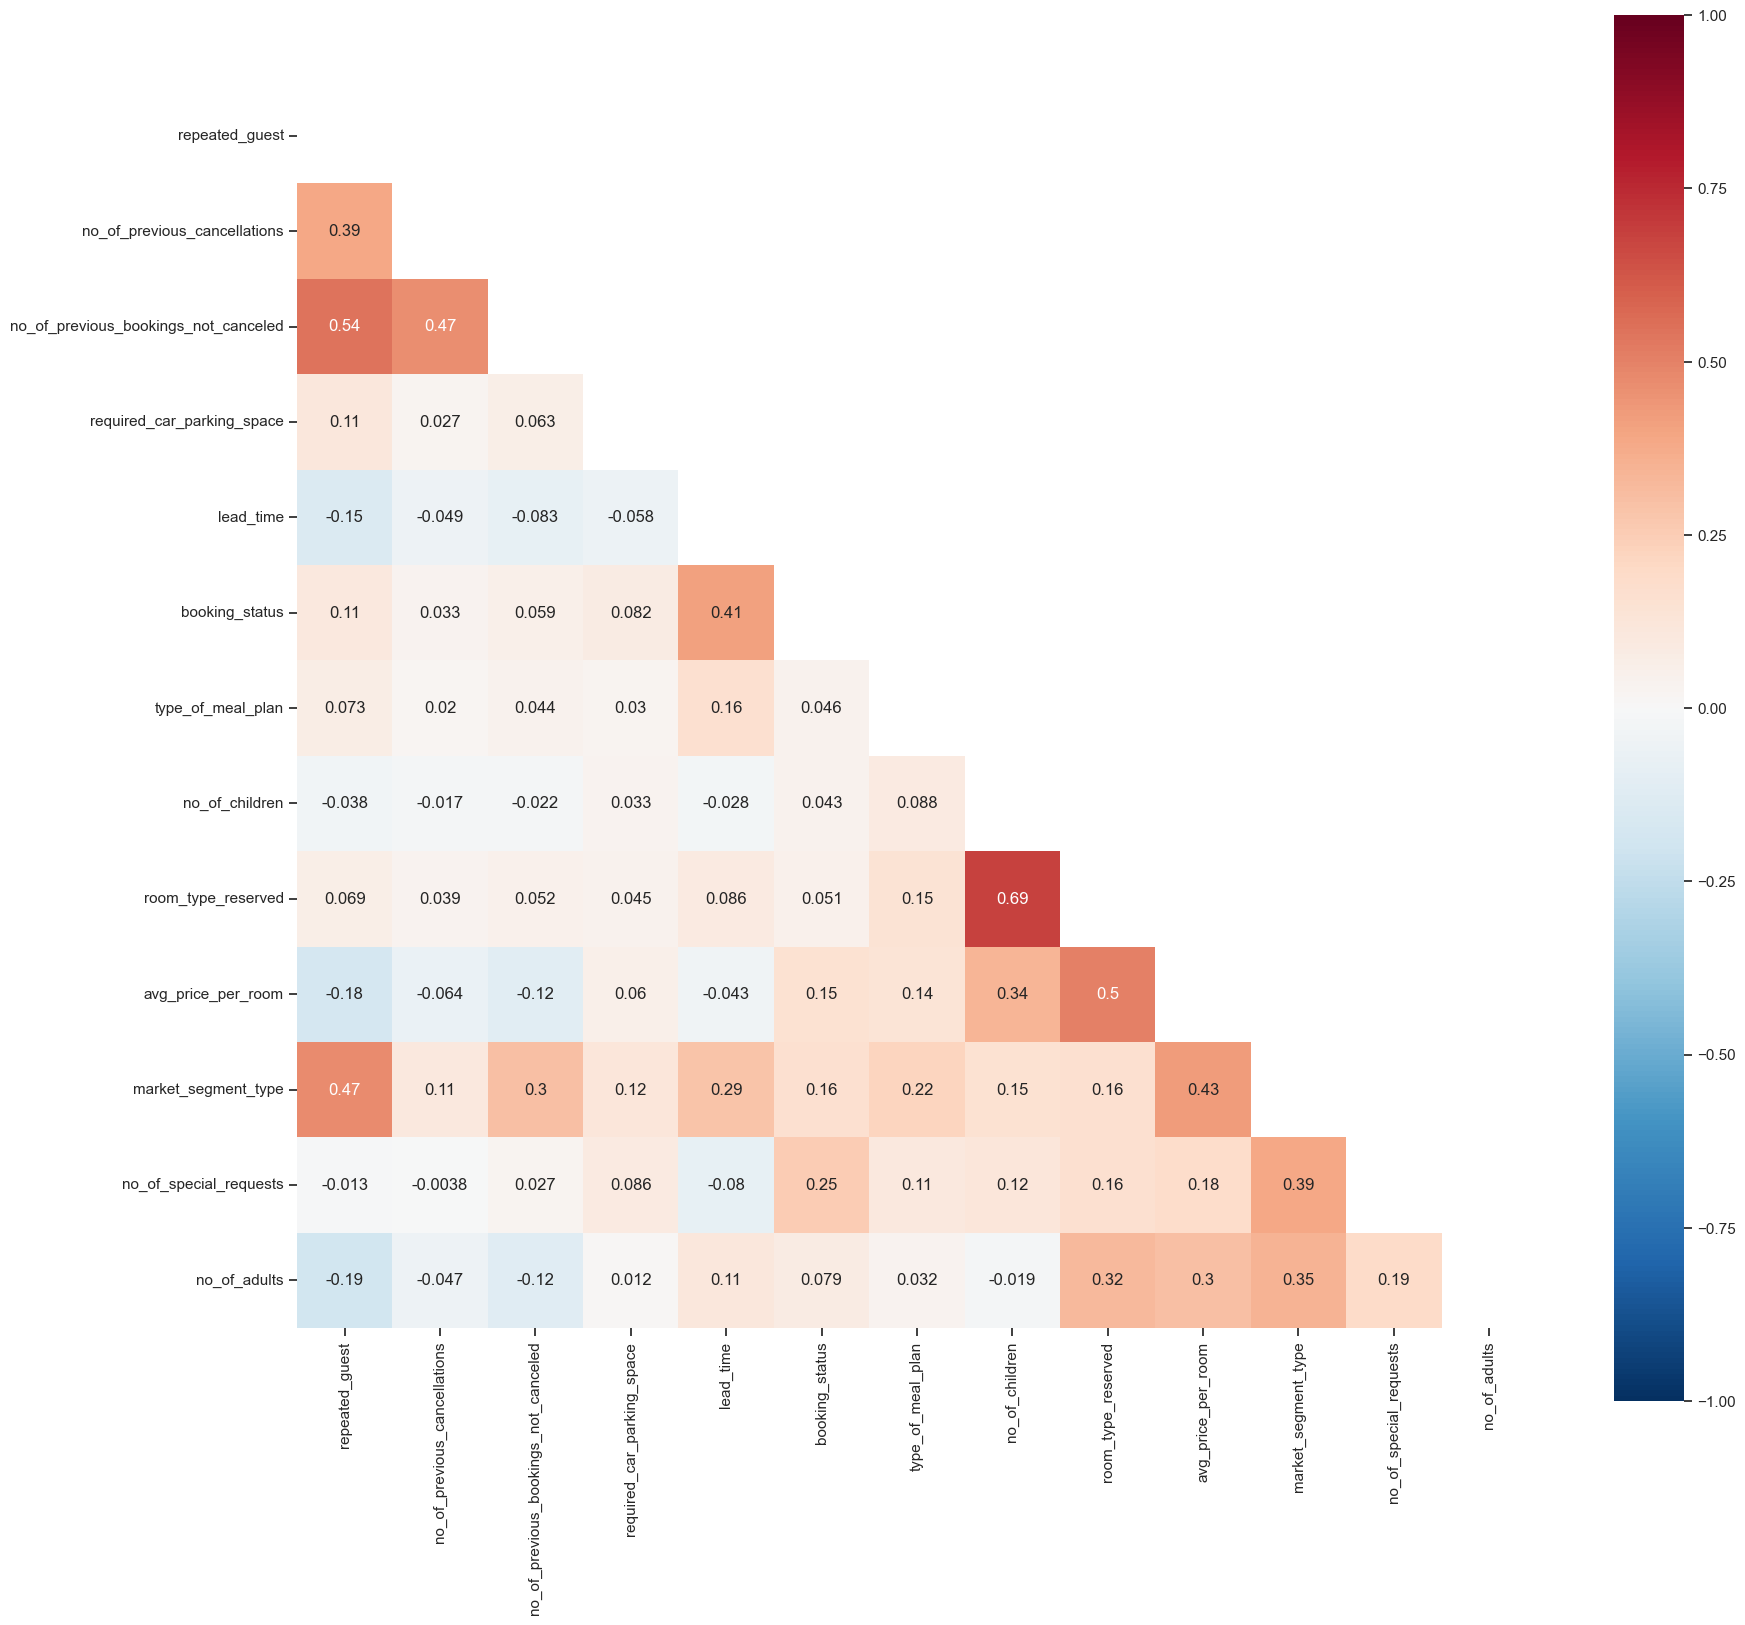

In [20]:
corr_matrix=res_corr['corr']
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,18))
sns.heatmap(corr_matrix, mask=mask, square=True, center=0, cmap='RdBu_r', annot=True, vmin=-1.0, vmax=1.0)

In [21]:
# y - вектор целевого признака
y = reservation_df["booking_status"].values

# X - матрица объекты-признаки
X = reservation_df.drop(["booking_status"], axis=1).values

In [22]:
# кодируем вектор целевого признака
y = LabelEncoder().fit_transform(y)
y
# 1 - Not_Canceled | 0 - Canceled

array([1, 1, 0, ..., 1, 0, 1])

In [23]:
# кодируем категориальные признаки

CT = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [2, 4, 6])],
    remainder="passthrough"
)
X = np.array(CT.fit_transform(X))
X

array([[1.0, 0.0, 0.0, ..., 0, 65.0, 0],
       [0.0, 0.0, 0.0, ..., 0, 106.68, 1],
       [1.0, 0.0, 0.0, ..., 0, 60.0, 0],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 98.39, 2],
       [0.0, 0.0, 0.0, ..., 0, 94.5, 0],
       [1.0, 0.0, 0.0, ..., 0, 161.67, 0]], dtype=object)

In [24]:
# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=77)

In [25]:
# первая модель на 20 соседях
cl1 = KNeighborsClassifier(n_neighbors=20)
cl1.fit(X_train, y_train)
target1_train = cl1.predict(X_train)
target1_test = cl1.predict(X_test)

# значение метрики accuracy на обучающей и тестовой выборках построенной модели
# accuracy_score(y_train, target1_train), accuracy_score(y_test, target1_test)
print(classification_report(y_train, target1_train), classification_report(y_test, target1_test))

              precision    recall  f1-score   support

           0       0.78      0.58      0.67      9748
           1       0.83      0.93      0.88     21701

    accuracy                           0.82     31449
   macro avg       0.81      0.75      0.77     31449
weighted avg       0.82      0.82      0.81     31449
               precision    recall  f1-score   support

           0       0.71      0.55      0.62      1068
           1       0.82      0.90      0.86      2427

    accuracy                           0.79      3495
   macro avg       0.76      0.72      0.74      3495
weighted avg       0.79      0.79      0.79      3495



In [26]:
# Оценка модели с применением кросс-валидации
scores = cross_val_score(cl1, X, y, cv=25)
np.mean(scores)

0.8015392886657798

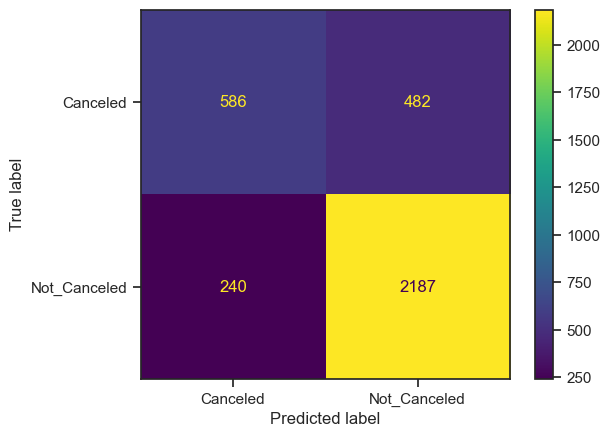

In [27]:
cm1 = confusion_matrix(y_test, target1_test, labels = cl1.classes_)
display_ = ConfusionMatrixDisplay(
    confusion_matrix=cm1,
    display_labels=['Canceled', 'Not_Canceled']
)
display_.plot()

In [28]:
# Подбор гиперпараметра на основе решетчатого поиска и кросс-валидации
n_range = np.array(range(5,50,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45])}]

In [29]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=25, scoring='accuracy')
clf_gs.fit(X, y)
clf_gs.best_params_

CPU times: total: 9min 6s
Wall time: 1min 36s


{'n_neighbors': 5}

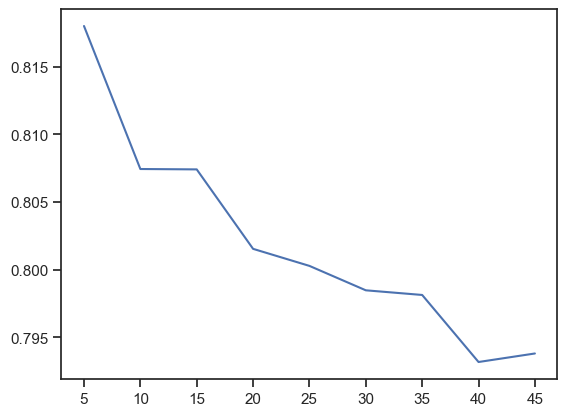

In [30]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [31]:
%%time
# Повторный подбор
n_range = np.array(range(4,12,1))
tuned_parameters = [{'n_neighbors': n_range}]
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=25, scoring='accuracy')
clf_gs.fit(X, y)
clf_gs.best_params_

CPU times: total: 7min 45s
Wall time: 1min 19s


{'n_neighbors': 5}

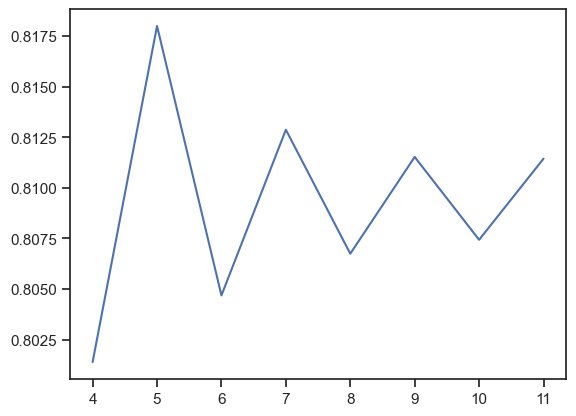

In [32]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [33]:
# Обучение модели и оценка качества с учетом подобранных гиперпараметров (k=5)
clf_gs.best_estimator_.fit(X_train, y_train)
target2_train = clf_gs.best_estimator_.predict(X_train)
target2_test = clf_gs.best_estimator_.predict(X_test)
# Новое качество модели
# accuracy_score(y_train, target2_train), accuracy_score(y_test, target2_test)
print(classification_report(y_train, target2_train), classification_report(y_test, target2_test))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      9748
           1       0.89      0.93      0.91     21701

    accuracy                           0.88     31449
   macro avg       0.86      0.84      0.85     31449
weighted avg       0.87      0.88      0.87     31449
               precision    recall  f1-score   support

           0       0.73      0.66      0.69      1068
           1       0.86      0.89      0.87      2427

    accuracy                           0.82      3495
   macro avg       0.79      0.77      0.78      3495
weighted avg       0.82      0.82      0.82      3495



In [34]:
# значение метрики accuracy до подбора гиперпараметра
# accuracy_score(y_train, target1_train), accuracy_score(y_test, target1_test)
print(classification_report(y_train, target1_train), classification_report(y_test, target1_test))

              precision    recall  f1-score   support

           0       0.78      0.58      0.67      9748
           1       0.83      0.93      0.88     21701

    accuracy                           0.82     31449
   macro avg       0.81      0.75      0.77     31449
weighted avg       0.82      0.82      0.81     31449
               precision    recall  f1-score   support

           0       0.71      0.55      0.62      1068
           1       0.82      0.90      0.86      2427

    accuracy                           0.79      3495
   macro avg       0.76      0.72      0.74      3495
weighted avg       0.79      0.79      0.79      3495



In [35]:
cm2 = confusion_matrix(y_test, target2_test, labels = clf_gs.classes_)

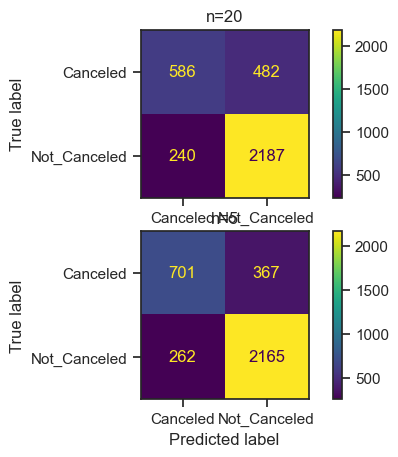

In [36]:
fig, ax = plt.subplots(2,1)
ax[0].set_title("n=20")
ax[1].set_title("n=5")

ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Canceled', 'Not_Canceled']).plot(ax=ax[0])

ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Canceled', 'Not_Canceled']).plot(ax=ax[1]);

In [37]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [38]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring='accuracy'):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

CPU times: total: 30min 17s
Wall time: 6min 33s


<module 'matplotlib.pyplot' from 'D:\\JetBrains\\PyCharm 2021.2.2\\PycharmProjects\\oad\\LR10\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

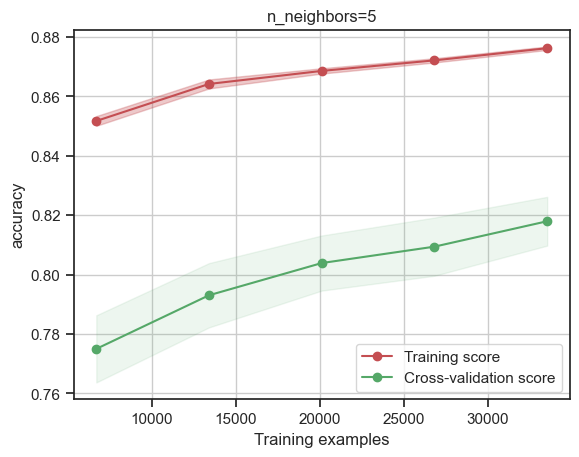

In [39]:
%%time
# Построение кривых обучения и валидации
plot_learning_curve(clf_gs.best_estimator_, 'n_neighbors=5', X, y, cv=25, train_sizes=np.linspace(.2, 1.0, 5))